Iterations:  8
x1:  1.8181687561695632e-16
x2:  1.0

Exact Solution:



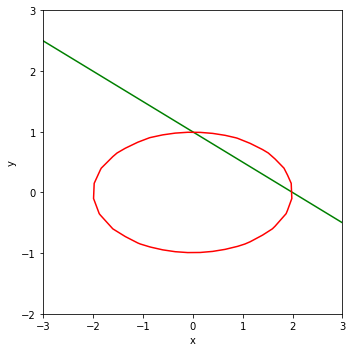

In [4]:
## Broyden's method according to Burden's Numerical Analysis
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# define broydens method
def broyden(x1, x2, f_equations, B_equations, tol, maxIters):
    
    #iterate counter 
    steps_taken = 0

    # evaluate functions 
    f = f_equations(x1,x2)
 
    # inverting B matrix
    B = np.linalg.inv(B_equations(x1,x2))
 
    # two conditions, 1) 2 norm (Frobenius norm in this case) exceeds tolerance
    # or 2) steps_taken exceeds iterations
    while np.linalg.norm(f,2) > tol and steps_taken < maxIters:
        
        d = B.dot(f_equations(x1,x2))
 
        x1 = x1 - d[0]
        x2 = x2 - d[1]
 
        newf = f_equations(x1,x2)
        z = newf - f
 
        # y = B(i-1)^-1 * [F(x(i)) - f(x(i-1))]  
        y = B.dot(z)

        # s = x(i) - x(i-1) 
        s = - 1 * d
 
        B = B  + np.dot(((s-y).dot(s)), B) / np.dot(s,y)
 
        f = newf
        steps_taken += 1
 
    return steps_taken, x1, x2  
 
# broydens function is currently set up for 2 equations with
# 2 unknowns but can be modified for larger systems 
# define tolerance, max iterations, and xin = initial vector 
tol = 10.0**-10
maxIters = 50
xin = np.array([1,2])

# define function and evaluate 
def fs(x1,x2):
    return np.array([x1 + 2*x2 - 2, x1**2 + 4*x2**2 - 4])

# first evaluation of Jacobian (labeled B here) 
def Bs(x1,x2):
    return np.array([[1,2], [2, 16]])
 
#A = np.array([[1,2], [2, 16]])
 
n, x1, x2 = broyden(xin[0], xin[1], fs, Bs, tol, maxIters)
print("Iterations: ", n)
print("x1: ", x1)
print("x2: ", x2)
print()
print("Exact Solution:")
print()

# create new figure 
fig = plt.figure(1, figsize=(5,5))

# step size for value ranges
delta = 0.25 
#create range of values 
x1,x2 = np.meshgrid(np.arange(-10.1,10.1,delta), np.arange(-10.1,10.1,delta))

f1 = x1 + 2*x2 - 2
f2 = x1**2 + 4*x2**2 - 4

# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# plot functions
plt.contour(x1, x2, f1, [0], colors = "green")
plt.contour(x1, x2, f2, [0], colors = "red")

#labels = ['f1', 'f2']
#plt.legend()

#label axis
plt.xlabel("x")
plt.ylabel("y")

# constrain graph window 
plt.xlim([-3, 3])
plt.ylim([-2, 3])

# display graph
plt.show()